C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


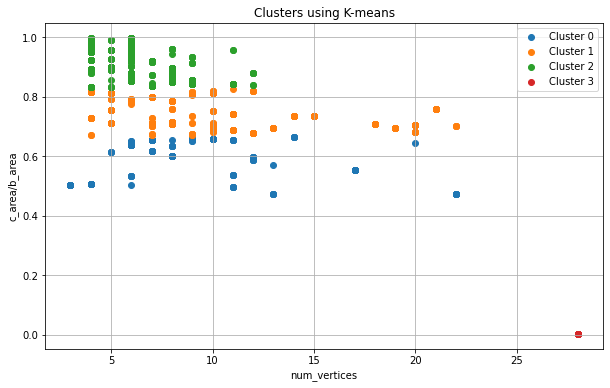

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df=pd.read_csv('df3.csv')
df=df.drop('complexity',axis=1)


# Select all 10 features for clustering
features = df.iloc[:, :10]  # Assuming the first 10 columns are the features

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['num_vertices'], cluster_data['c_area/b_area'], label=f'Cluster {cluster}')

plt.title('Clusters using K-means')
plt.xlabel('num_vertices')
plt.ylabel('c_area/b_area')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
df

,num_vertices,x,y,w,h,c_area,solidity,circularity,bounding_box_area,c_area/b_area,Cluster
0,6,102,73,452,339,134731.5,0.945604,0.690835,153228,0.879288,2
1,9,102,73,452,338,130780.5,0.977177,0.724908,152776,0.856028,2
2,20,102,73,452,338,107663.5,0.933878,0.686581,152776,0.704715,1
3,14,102,74,452,337,101004.0,0.902490,0.598691,152324,0.663087,0
4,5,101,74,454,338,146805.5,0.994186,0.766928,153452,0.956687,2
...,...,...,...,...,...,...,...,...,...,...,...
1178,21,102,74,453,336,115441.5,0.938373,0.589889,152208,0.758446,1
1179,3,102,74,452,337,76794.0,0.992908,0.507339,152324,0.504149,0
1180,19,101,74,453,337,105909.0,0.970449,0.725765,152661,0.693753,1
1181,8,101,73,454,339,147651.5,0.995292,0.792612,153906,0.959362,2


In [3]:
df.describe()

,num_vertices,x,y,w,h,c_area,solidity,circularity,bounding_box_area,c_area/b_area,Cluster
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,8.147084,101.760778,73.547760,452.385461,337.659341,121906.139053,0.951572,0.684133,152752.118343,0.797988,1.338123
std,4.629451,0.453693,0.521169,0.586242,0.764988,23082.871376,0.100117,0.103409,375.876113,0.150897,0.748801
min,3.000000,101.000000,73.000000,451.000000,335.000000,267.500000,0.002687,0.000351,151536.000000,0.001761,0.000000
25%,5.000000,101.000000,73.000000,452.000000,337.000000,107663.500000,0.935667,0.651287,152544.000000,0.704715,1.000000
50%,7.000000,102.000000,74.000000,452.000000,338.000000,124285.500000,0.977177,0.697979,152776.000000,0.815929,1.000000
75%,10.000000,102.000000,74.000000,453.000000,338.000000,140696.000000,0.995220,0.758598,153114.000000,0.920572,2.000000
max,28.000000,103.000000,75.000000,454.000000,339.000000,153005.500000,0.999814,0.809253,153906.000000,0.999291,3.000000


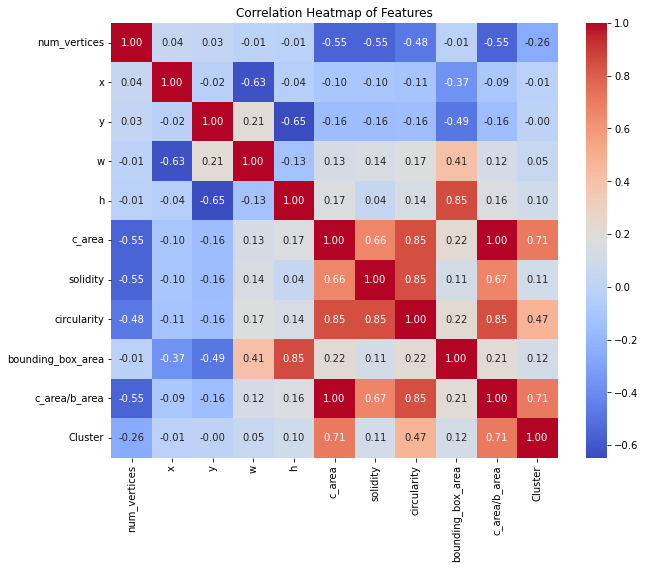

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = df.columns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=feature_names, yticklabels=feature_names)
plt.title('Correlation Heatmap of Features')
plt.show()


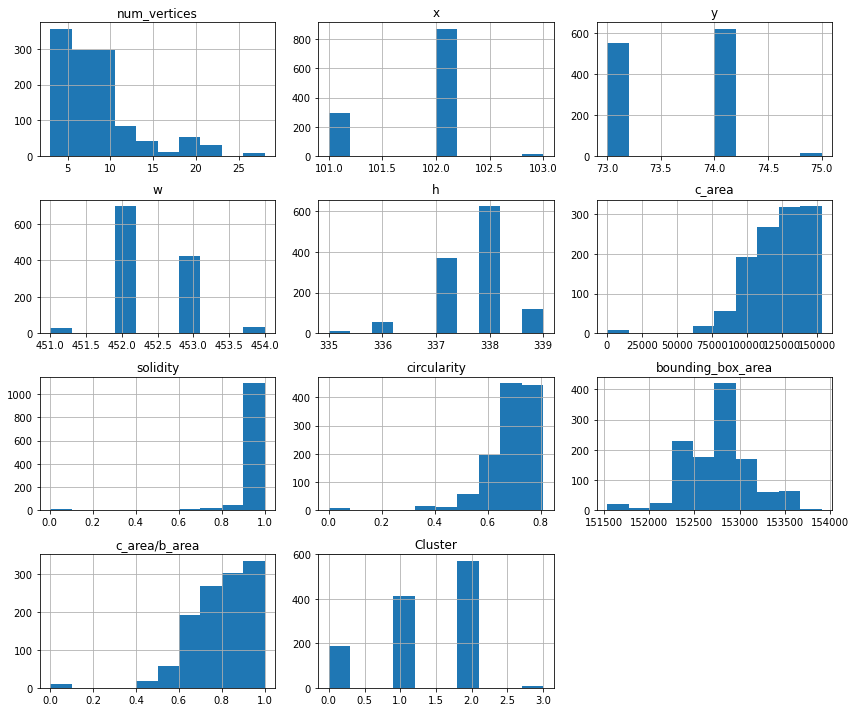

In [5]:
import matplotlib.pyplot as plt

# Plot histograms of all features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

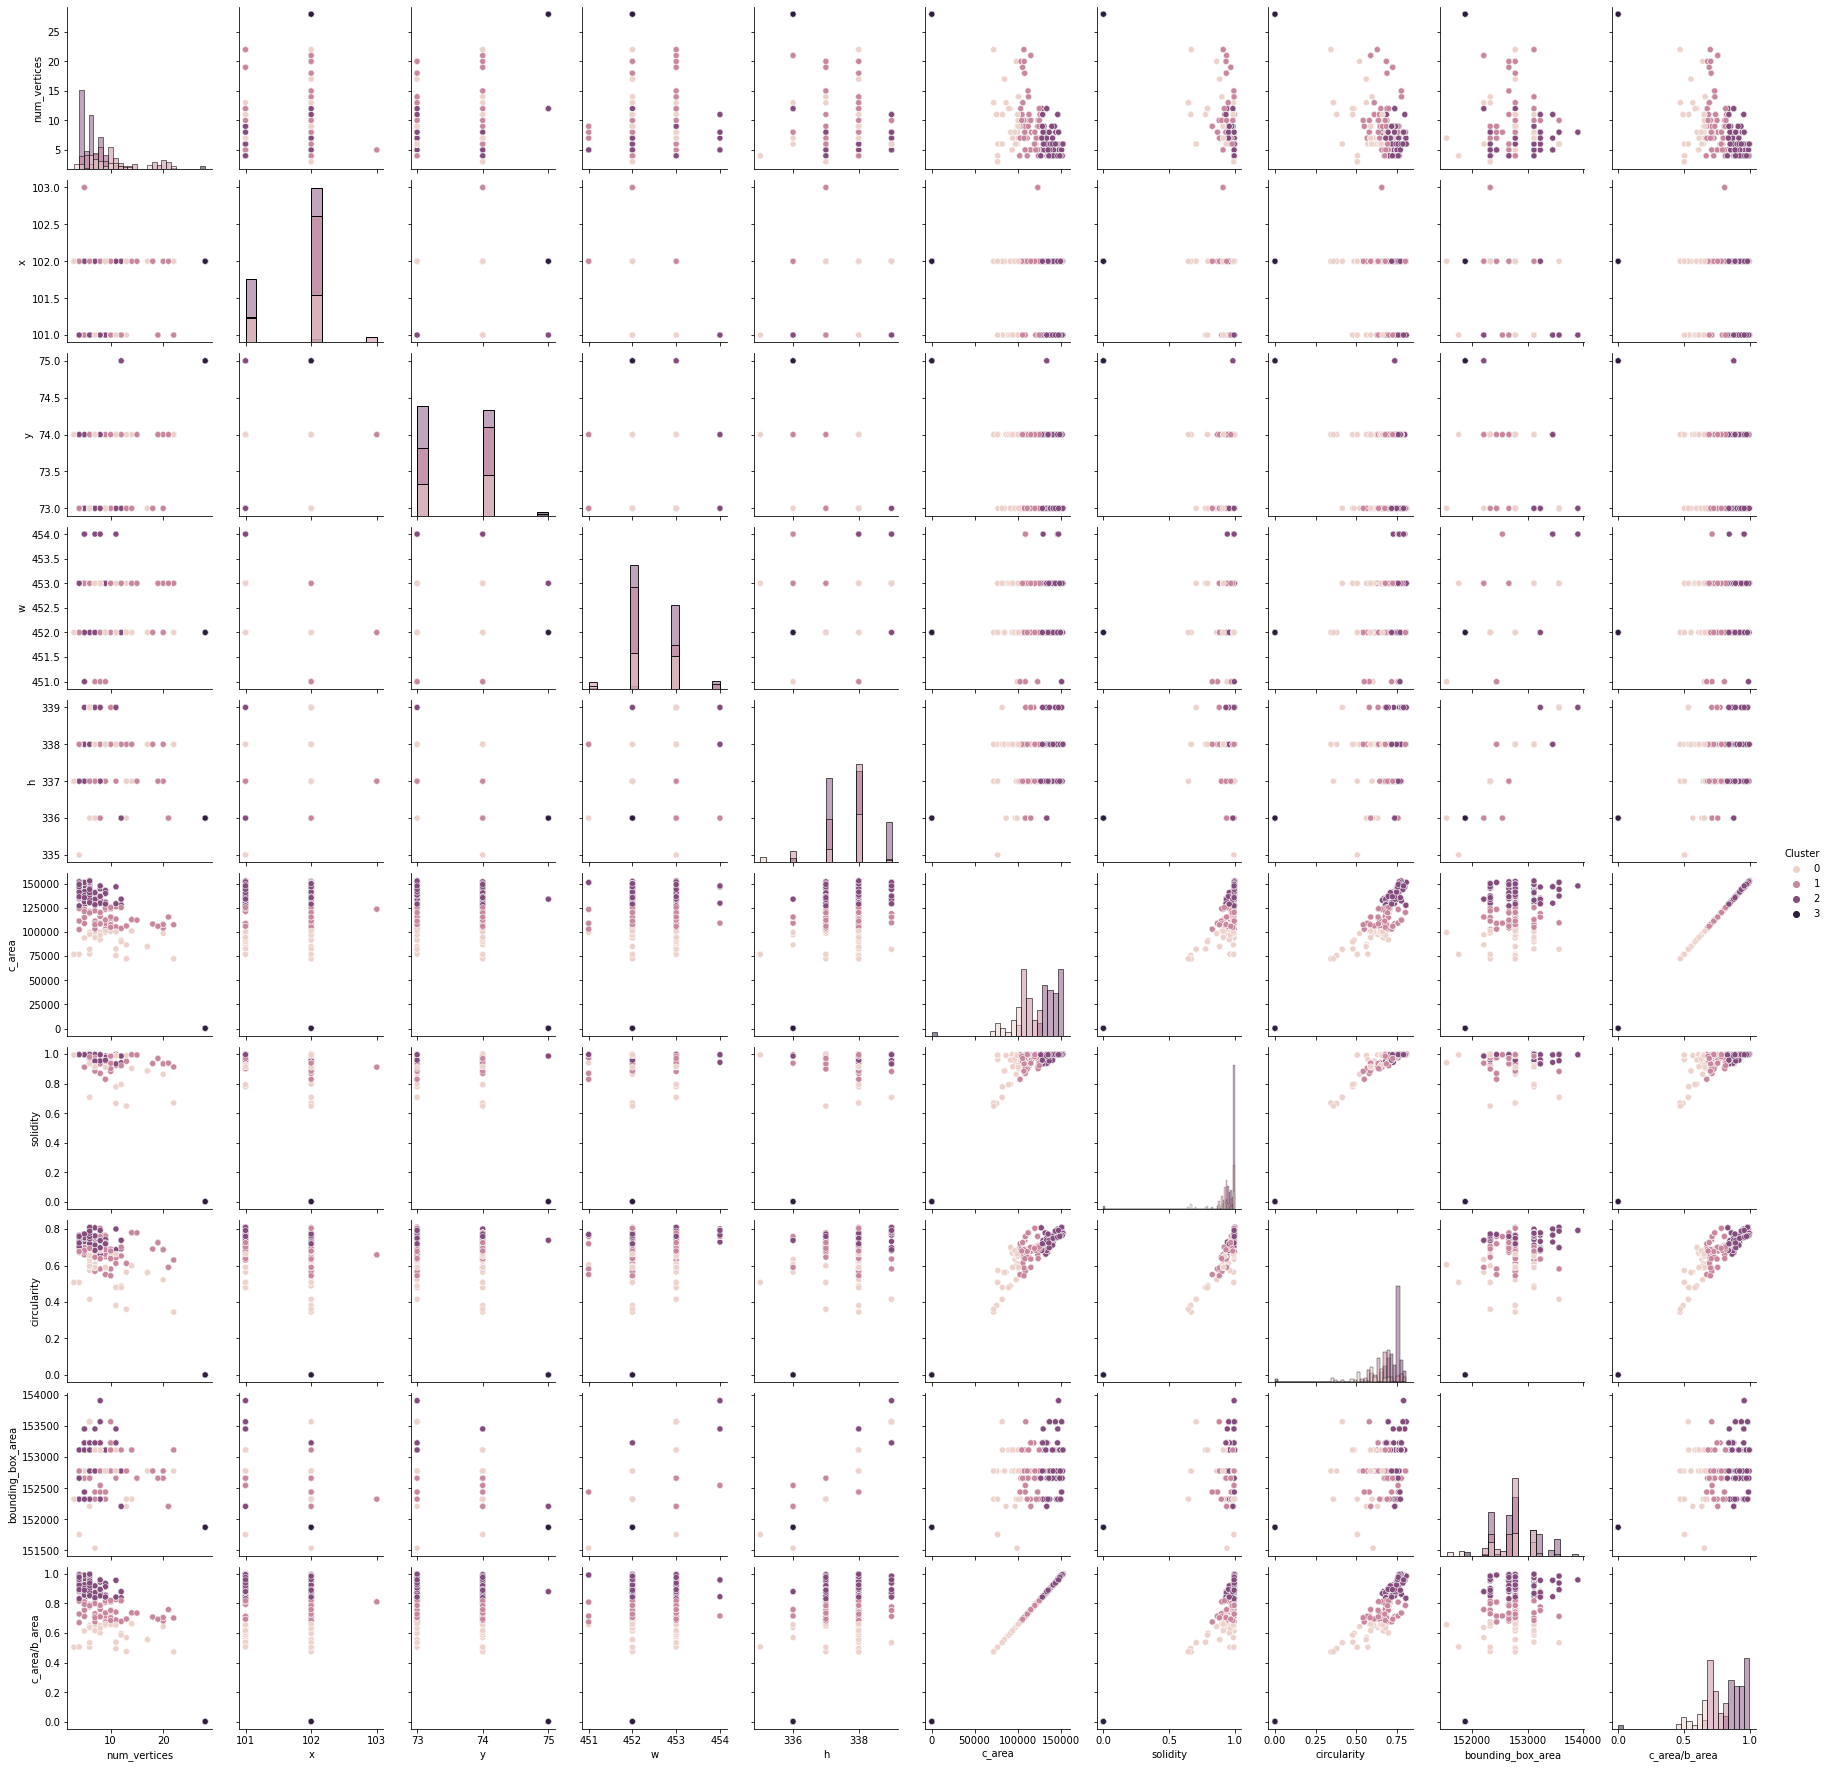

In [6]:
import seaborn as sns

# Assuming 'target' is your target variable
sns.pairplot(df, hue='Cluster', diag_kind='hist')
plt.show()


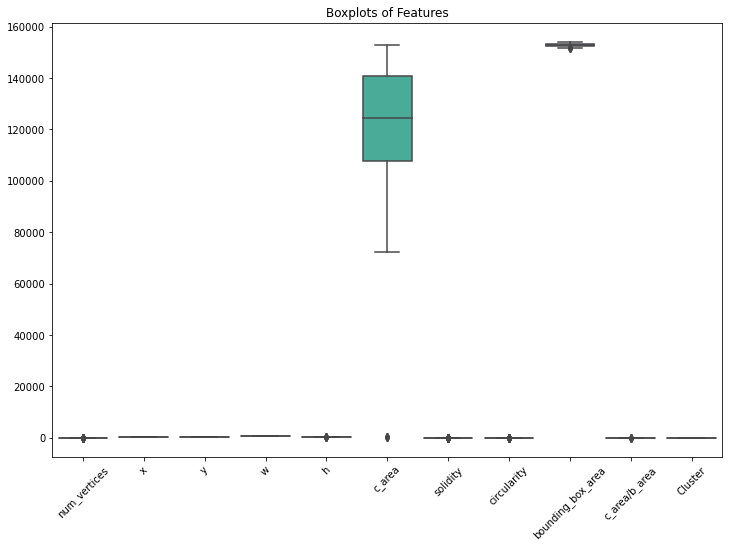

In [7]:
# Plot boxplots of all features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplots of Features')
plt.xticks(rotation=45)
plt.show()


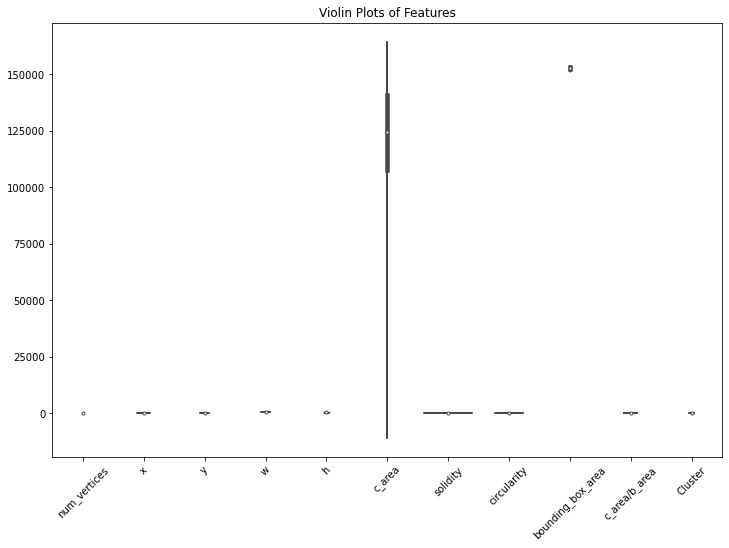

In [8]:
# Plot violin plots of all features
plt.figure(figsize=(12, 8))
sns.violinplot(data=df)
plt.title('Violin Plots of Features')
plt.xticks(rotation=45)
plt.show()


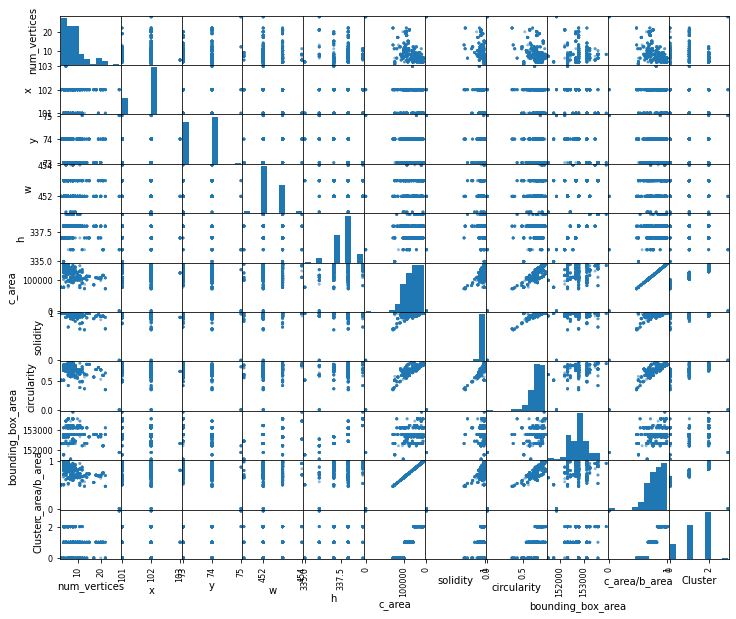

In [9]:
from pandas.plotting import scatter_matrix

# Plot scatter matrix
scatter_matrix(df, figsize=(12, 10))
plt.show()


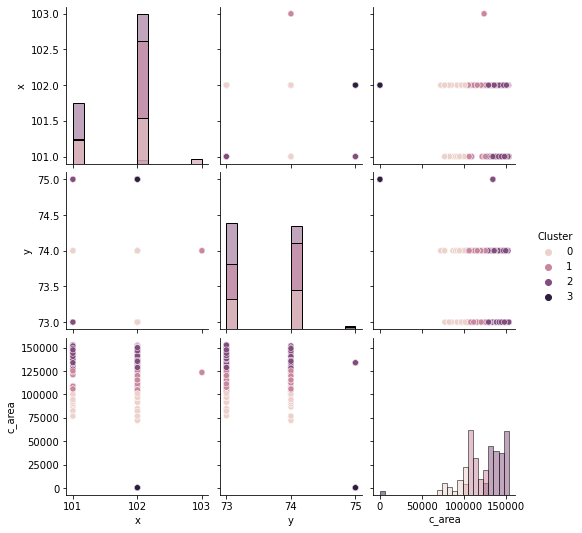

In [10]:
# Plot pairwise scatter plots between 'x' and 'y' features
sns.pairplot(df[['x', 'y', 'c_area', 'Cluster']], hue='Cluster', diag_kind='hist')
plt.show()


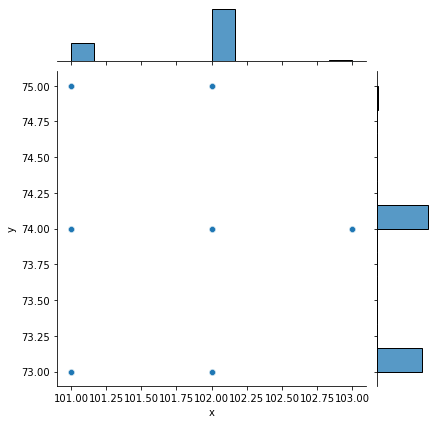

In [11]:
# Plot jointplot between 'x' and 'y' features
sns.jointplot(x='x', y='y', data=df, kind='scatter')
plt.show()
